<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" width="20%" />

# Keras: Deep Learning library for TensorFlow

>Keras is a minimalist, highly modular neural networks library, written in Python and capable of running on top TensorFlow.

>It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.
ref: https://keras.io/

## 🍔 First Neural Network with Keras



In [1]:
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def preprocess_mnist(x_train, y_train):
  x_train = x_train.reshape(x_train.shape[0], 28*28)
  x_train = x_train.astype('float32')
  x_train /= 255
  y_train = to_categorical(y_train)
  return x_train, y_train

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


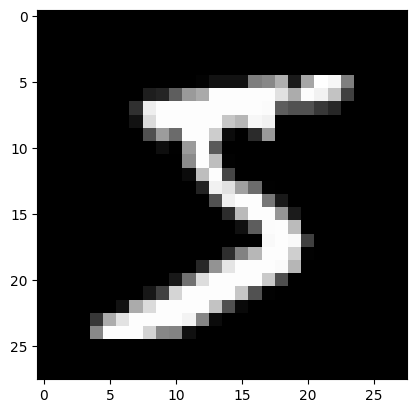

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0].reshape(28, 28), cmap='gray')

x_train, y_train = preprocess_mnist(x_train, y_train)
x_test, y_test = preprocess_mnist(x_test, y_test)

### Building blocks (Sequantial API)



*   Dense = Fully connected layer ([Official docs](https://keras.io/api/layers/core_layers/dense/))
*   Activation = Activation function ([Official docs](https://keras.io/api/layers/activations/))
* Sequential = Group a set of layers sequentially ([Official docs](https://keras.io/api/models/sequential/))




In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input

dims = x_train.shape[1]
print('Input Shape =', dims)

nb_classes = y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model = Sequential()
model.add(Input((dims,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

Input Shape = 784
Number classes = Output Shape = 10


### Inspect the model structure

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,818 (100.85 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

It is mandatory to compile a Keras model before training or using it! This function also requires some additional parameters:

* optimizer = Training optimizer ([Official docs](https://keras.io/api/optimizers/))
* loss = Loss function ([Official docs](https://keras.io/api/losses/))
* metrics = Metrics to be monitored during training ([Official docs](https://keras.io/api/metrics/))

In [6]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

And then train it!



In [7]:
model.fit(x_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.6161 - loss: 1.3620


### Predict

In [8]:
predictions = model.predict(x_test)

int_predictions = np.argmax(predictions, axis=1)

print(int_predictions[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[7 2 1 0 4 1 4 9 6 9]


## ⭐ Hyperparameters



In [9]:
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

def preprocess_mnist(x_train, y_train):
  x_train = x_train.reshape(x_train.shape[0], 28*28)
  x_train = x_train.astype('float32')
  x_train /= 255
  y_train = to_categorical(y_train)
  return x_train, y_train

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, y_train = preprocess_mnist(x_train, y_train)
x_test, y_test = preprocess_mnist(x_test, y_test)

### 🍔 Build the network

Hyperparameters:

* **optimizer**
* **learning_rate** = controls how much the model's weights are adjusted with respect to the gradient during each training step.

### Effects of learning rate value

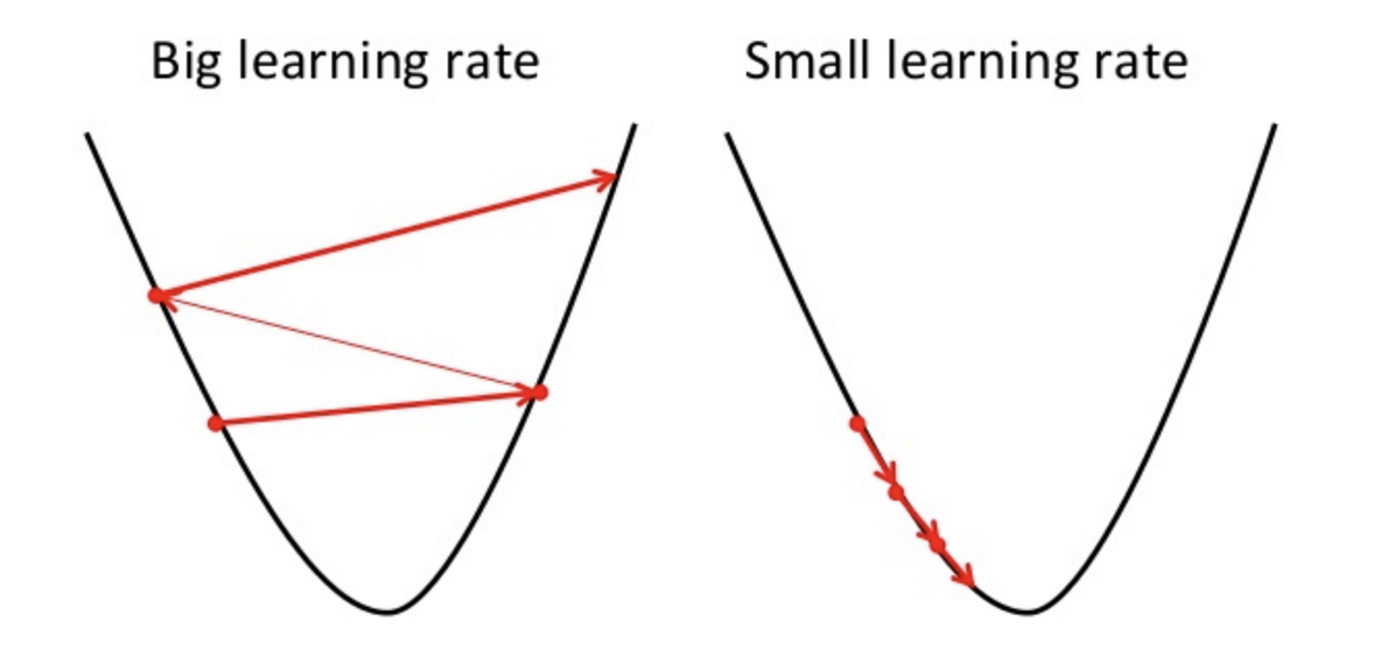

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

dims = x_train.shape[1]
print('Input Shape =', dims)

nb_classes = y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model = Sequential()
model.add(Input((dims,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))

optimizer = SGD(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])

Input Shape = 784
Number classes = Output Shape = 10


### 🏋 Training

Hyperparameters:

* **batch_size** = dimension of the batch during (number of training elements considered before updating the weights during backpropagation).
* **epochs** = number of times the training is repeated.
* **validation_split** = percentage of the dimension of the validation set (it is also possible to specify the validation set itself)

In [11]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1336 - loss: 2.2973 - val_accuracy: 0.2317 - val_loss: 2.2002
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2677 - loss: 2.1723 - val_accuracy: 0.3285 - val_loss: 2.0660
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3362 - loss: 2.0379 - val_accuracy: 0.3800 - val_loss: 1.8992
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3830 - loss: 1.8662 - val_accuracy: 0.4278 - val_loss: 1.7018
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4295 - loss: 1.6711 - val_accuracy: 0.5167 - val_loss: 1.4930
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5197 - loss: 1.4790 - val_accuracy: 0.6250 - val_loss: 1.2891
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6141 - loss: 1.2874 - val_accuracy: 0.7112 - val_loss: 1.1086
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6911 - loss: 1.1225 - val_accuracy: 0.

### 📊 Monitor training performance

It is usually useful to monitor performance during training to understand which hyperparameters need to be adjusted.

In [12]:
import matplotlib.pyplot as plt

def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

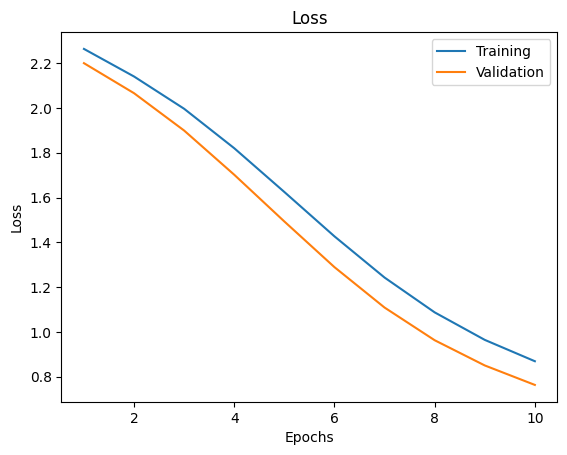

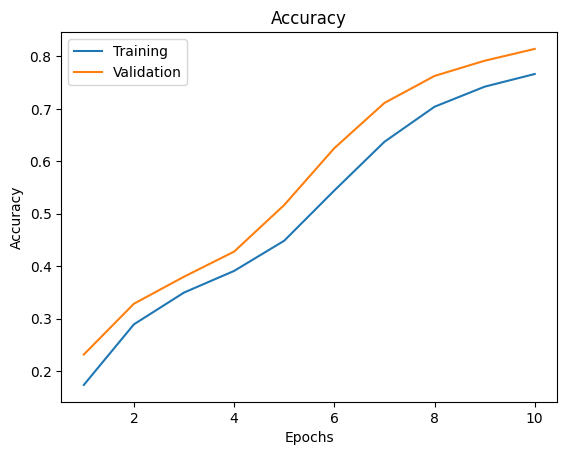

In [13]:
plot_loss(history)
plot_accuracy(history)

### Examples

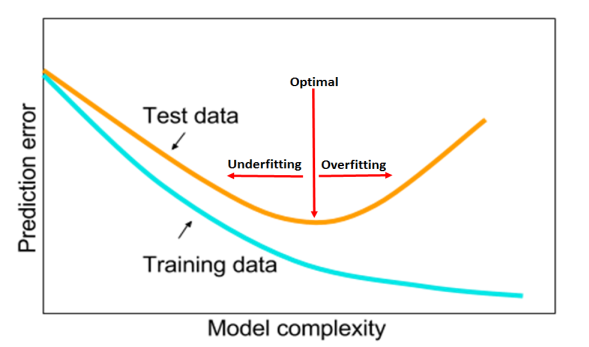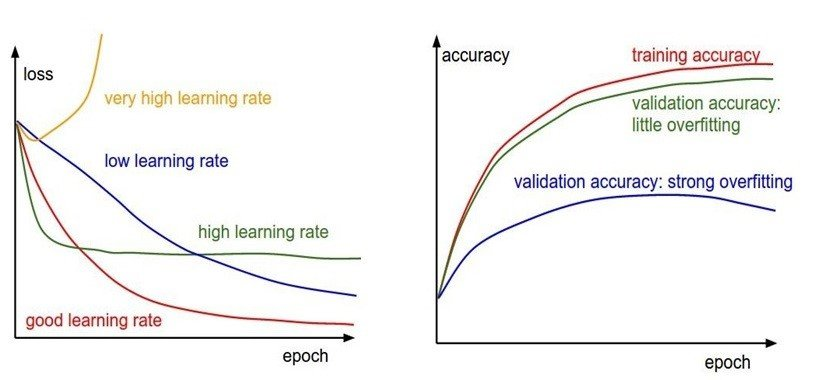

## 📕 Exercise

Take the dataset on elearning (from Kaggle) or one of the datasets available in keras ([here](https://keras.io/api/datasets/)) and play a bit with neural networks:



* Add some layers.
* Assign an activation function to each of them.
* Choose the values of the hyperparameters (batch_size, optimizer, learning_rate, epochs).
* Monitor the performance on a validation set and observe how the shape of the plot changes as one hyperparameter at a time is changed.
* Calculate the performance on the test set.

## Kaggle Challenge Data

>The Otto Group is one of the world’s biggest e-commerce companies, A consistent analysis of the performance of products is crucial. However, due to diverse global infrastructure, many identical products get classified differently.
For this competition, we have provided a dataset with 93 features for more than 200,000 products. The objective is to build a predictive model which is able to distinguish between our main product categories.
Each row corresponds to a single product. There are a total of 93 numerical features, which represent counts of different events. All features have been obfuscated and will not be defined any further.

https://www.kaggle.com/c/otto-group-product-classification-challenge/data

### Data Preparation

### Utility functions

Utility functions to load Kaggle Otto Group Challenge Data.

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

def load_data(path, train=True):
    """Load data from a CSV File

    Parameters
    ----------
    path: str
        The path to the CSV file

    train: bool (default True)
        Decide whether or not data are *training data*.
        If True, some random shuffling is applied.

    Return
    ------
    X: numpy.ndarray
        The data as a multi dimensional array of floats
    ids: numpy.ndarray
        A vector of ids for each sample
    """
    text = pd.read_csv(path, encoding = "ISO-8859-2")
    df = pd.read_csv(path)
    X = df.values.copy()
    if train:
        np.random.shuffle(X)
        X, labels = X[:, 1:-1].astype(np.float32), X[:, -1]
        return X, labels
    else:
        X, ids = X[:, 1:].astype(np.float32), X[:, 0].astype(str)
        return X, ids


def preprocess_data(X, scaler=None):
    """Preprocess input data by standardise features
    by removing the mean and scaling to unit variance"""
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler


def preprocess_labels(labels, encoder=None, categorical=True):
    """Encode labels with values among 0 and `n-classes-1`"""
    if not encoder:
        encoder = LabelEncoder()
        encoder.fit(labels)
    y = encoder.transform(labels).astype(np.int32)
    if categorical:
        y = to_categorical(y)
    return y, encoder

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### Import data

In [16]:
url_train = 'https://raw.githubusercontent.com/leriomaggio/deep-learning-keras-tensorflow/master/data/kaggle_ottogroup/train.csv'
url_test = 'https://raw.githubusercontent.com/leriomaggio/deep-learning-keras-tensorflow/master/data/kaggle_ottogroup/test.csv'
X_train, labels = load_data(url_train, train=True)

print("Training set data")
print(X_train)

print("Training set labels")
print(labels)

Training set data
[[ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0. 10. ...  0.  0.  0.]
 [ 0.  0.  2. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
Training set labels
['Class_9' 'Class_6' 'Class_9' ... 'Class_6' 'Class_2' 'Class_9']


### Preprocess data

In [17]:
X_train, labels = load_data(url_train, train=True)
X_train, scaler = preprocess_data(X_train)
Y_train, encoder = preprocess_labels(labels)

X_test, ids = load_data(url_test, train=False)
X_test, _ = preprocess_data(X_test, scaler)

nb_classes = Y_train.shape[1]
print(nb_classes, 'classes')

dims = X_train.shape[1]
print(X_train.shape, 'dims Training set')

9 classes
(61878, 93) dims Training set


#MODIFICA SOLO AL LEARNING RATE, 0.001, 0.01, 0.0001, EPOCHE 10 SGD

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model1 = Sequential()
model1.add(Input((dims,)))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(nb_classes, activation='softmax'))

optimizer1 = SGD(learning_rate=0.001)

model1.compile(optimizer=optimizer1, loss='categorical_crossentropy',
              metrics=['accuracy'])

Input Shape = 93
Number classes = Output Shape = 9


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model2 = Sequential()
model2.add(Input((dims,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(nb_classes, activation='softmax'))

optimizer2 = SGD(learning_rate=0.01)

model2.compile(optimizer=optimizer2, loss='categorical_crossentropy',
              metrics=['accuracy'])

Input Shape = 93
Number classes = Output Shape = 9


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model3 = Sequential()
model3.add(Input((dims,)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(nb_classes, activation='softmax'))

optimizer3 = SGD(learning_rate=0.0001)

model3.compile(optimizer=optimizer3, loss='categorical_crossentropy',
              metrics=['accuracy'])

Input Shape = 93
Number classes = Output Shape = 9


In [21]:
history1 = model1.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.1)
history2 = model2.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.1)
history3 = model3.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1009 - loss: 2.4241 - val_accuracy: 0.2526 - val_loss: 2.1409
Epoch 2/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2745 - loss: 2.0908 - val_accuracy: 0.3730 - val_loss: 1.9474
Epoch 3/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3887 - loss: 1.9061 - val_accuracy: 0.4638 - val_loss: 1.7841
Epoch 4/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4816 - loss: 1.7479 - val_accuracy: 0.5291 - val_loss: 1.6343
Epoch 5/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5438 - loss: 1.5980 - val_accuracy: 0.5706 - val_loss: 1.5001
Epoch 6/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5800 - loss: 1.4668 - val_accuracy: 0.5928 - val_loss: 1.3866
Epoch 7/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6043 - loss: 1.3541 - val_accuracy: 0.6101 - val_loss: 1.2929
Epoch 8/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6210 - loss: 1.2661 - val_accuracy: 0.

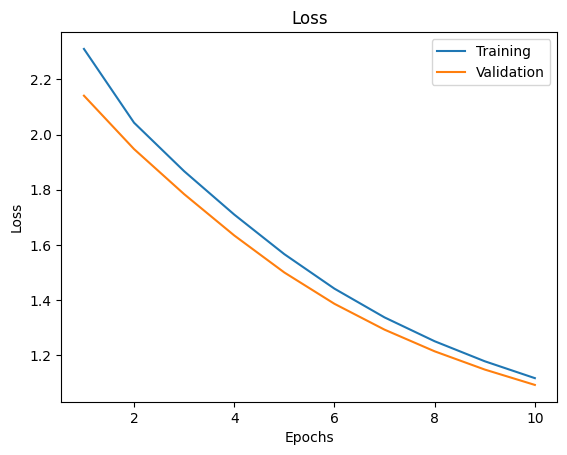

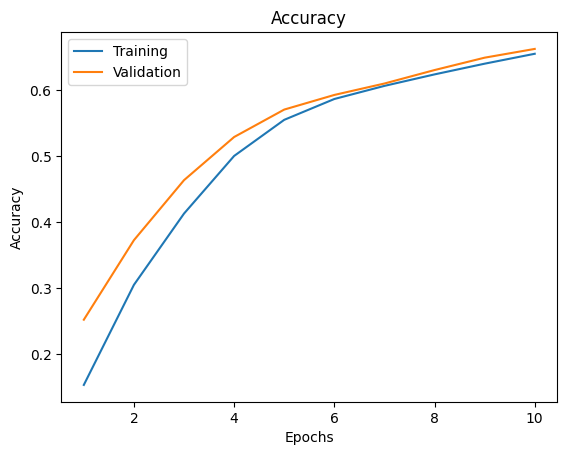

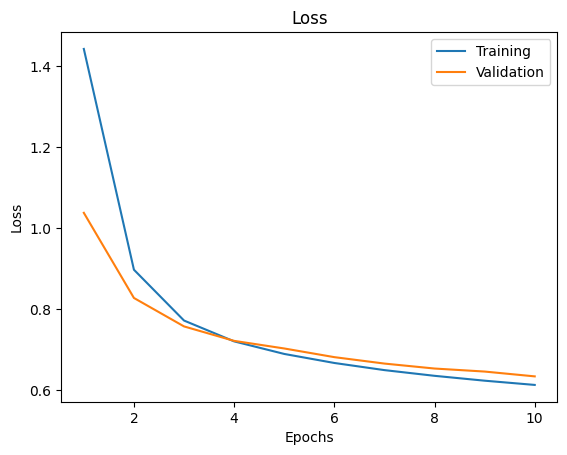

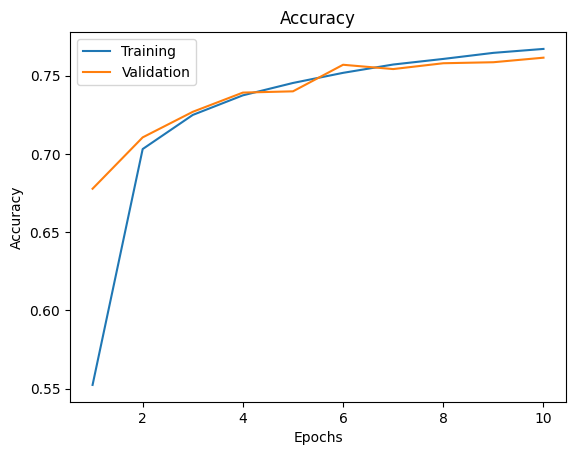

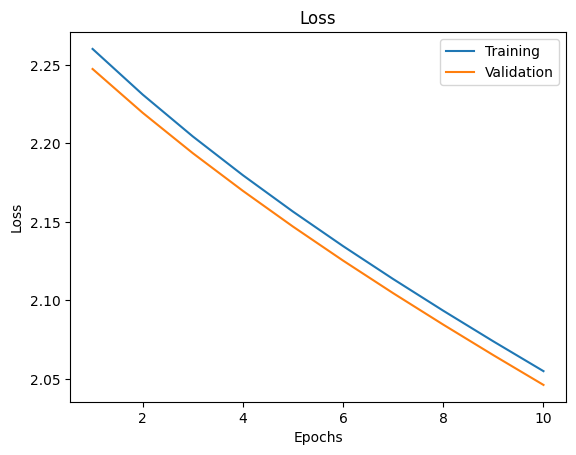

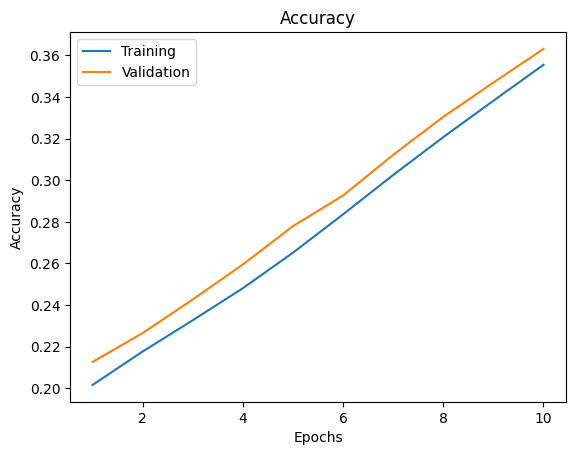

In [22]:
plot_loss(history1)
plot_accuracy(history1)

plot_loss(history2)
plot_accuracy(history2)

plot_loss(history3)
plot_accuracy(history3)

## MODIFICHE SOLO ALLE EPOCHE = 50

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model1 = Sequential()
model1.add(Input((dims,)))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(nb_classes, activation='softmax'))

optimizer1 = SGD(learning_rate=0.001)

model1.compile(optimizer=optimizer1, loss='categorical_crossentropy',
              metrics=['accuracy'])

Input Shape = 93
Number classes = Output Shape = 9


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model2 = Sequential()
model2.add(Input((dims,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(nb_classes, activation='softmax'))

optimizer2 = SGD(learning_rate=0.001)

model2.compile(optimizer=optimizer2, loss='categorical_crossentropy',
              metrics=['accuracy'])

Input Shape = 93
Number classes = Output Shape = 9


In [25]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model3 = Sequential()
model3.add(Input((dims,)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(nb_classes, activation='softmax'))

optimizer3 = SGD(learning_rate=0.001)

model3.compile(optimizer=optimizer3, loss='categorical_crossentropy',
              metrics=['accuracy'])

Input Shape = 93
Number classes = Output Shape = 9


In [26]:
history1 = model1.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.1)
history2 = model2.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.1)
history3 = model3.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1146 - loss: 2.1976 - val_accuracy: 0.2266 - val_loss: 2.0203
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2484 - loss: 1.9801 - val_accuracy: 0.3533 - val_loss: 1.8683
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3779 - loss: 1.8391 - val_accuracy: 0.4678 - val_loss: 1.7431
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4814 - loss: 1.7221 - val_accuracy: 0.5242 - val_loss: 1.6285
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5322 - loss: 1.6036 - val_accuracy: 0.5525 - val_loss: 1.5193
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5558 - loss: 1.4965 - val_accuracy: 0.5808 - val_loss: 1.4141
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5838 - loss: 1.3894 - val_accuracy: 0.6083 - val_loss: 1.3183
Epoch 8/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6071 - loss: 1.3027 - val_accuracy: 0.

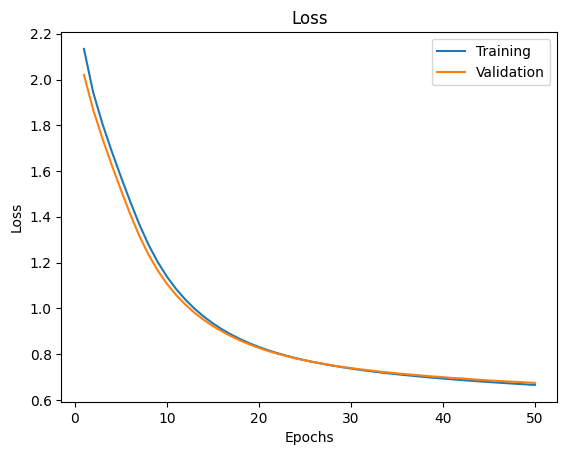

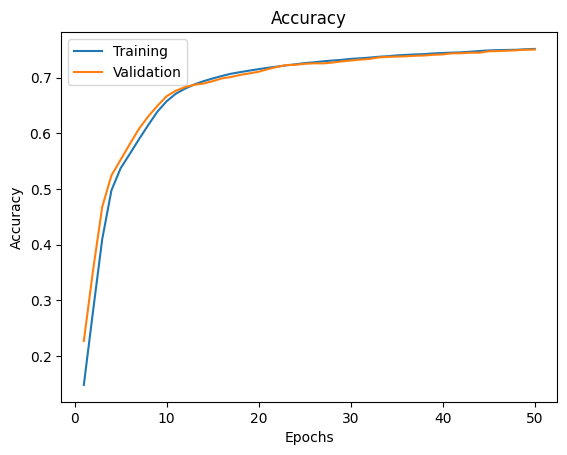

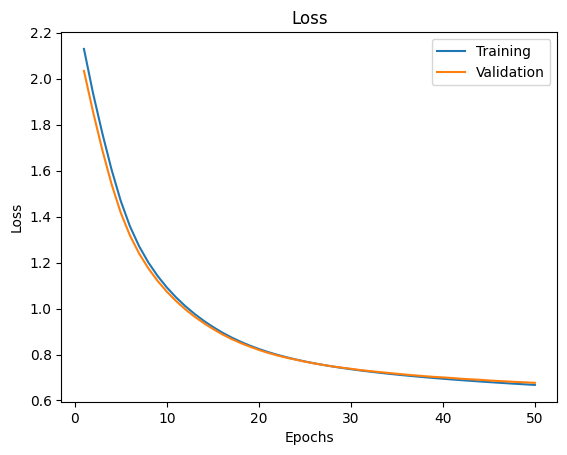

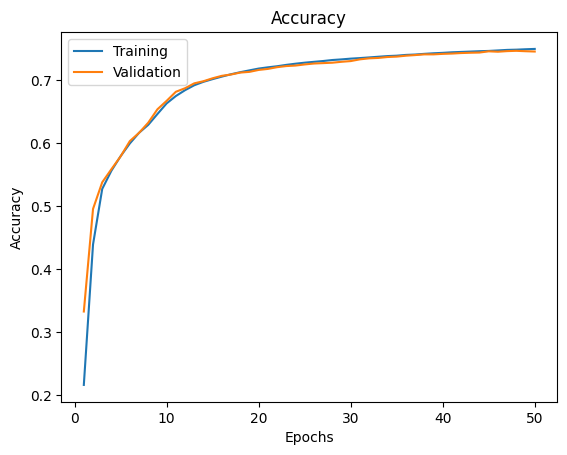

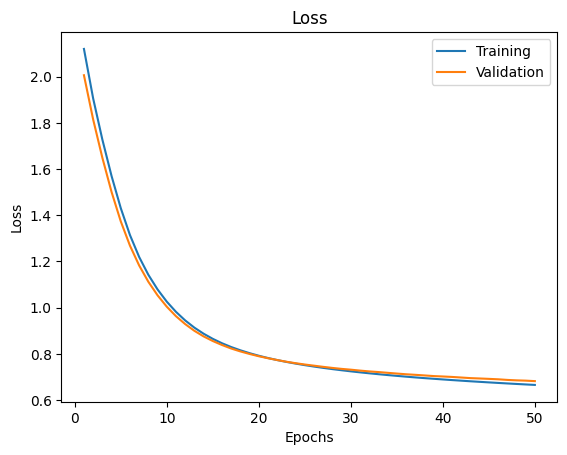

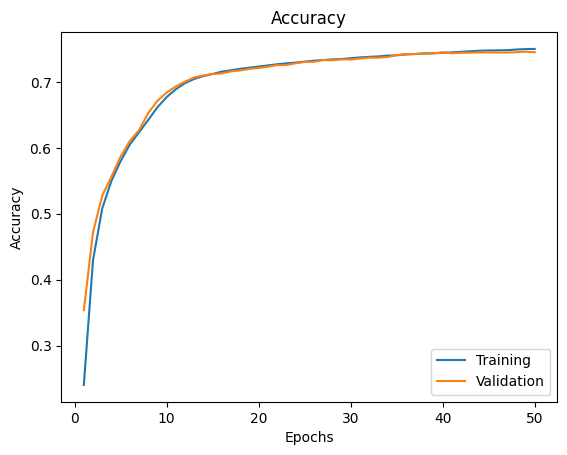

In [27]:
plot_loss(history1)
plot_accuracy(history1)

plot_loss(history2)
plot_accuracy(history2)

plot_loss(history3)
plot_accuracy(history3)

##MODIFICHE SOLO AL MODELLO 3 CON EPOCHE = 100

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer
from keras.optimizers import Adam  # Importa Adam

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model3 = Sequential()
model3.add(Input((dims,)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(nb_classes, activation='softmax'))

# Usa Adam come ottimizzatore
optimizer3 = SGD(learning_rate=0.0001)

model3.compile(optimizer=optimizer3, loss='categorical_crossentropy', metrics=['accuracy'])


Input Shape = 93
Number classes = Output Shape = 9


In [29]:
history3 = model3.fit(X_train, Y_train, batch_size=128, epochs=100, validation_split=0.1)

Epoch 1/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1359 - loss: 2.1850 - val_accuracy: 0.1561 - val_loss: 2.1587
Epoch 2/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1567 - loss: 2.1436 - val_accuracy: 0.1837 - val_loss: 2.1193
Epoch 3/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1907 - loss: 2.1060 - val_accuracy: 0.2203 - val_loss: 2.0850
Epoch 4/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2330 - loss: 2.0710 - val_accuracy: 0.2565 - val_loss: 2.0546
Epoch 5/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2723 - loss: 2.0416 - val_accuracy: 0.2991 - val_loss: 2.0274
Epoch 6/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3062 - loss: 2.0172 - val_accuracy: 0.3353 - val_loss: 2.0026
Epoch 7/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3418 - loss: 1.9914 - val_accuracy: 0.3675 - val_loss: 1.9796
Epoch 8/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3713 - loss: 1.9690 - val_accu

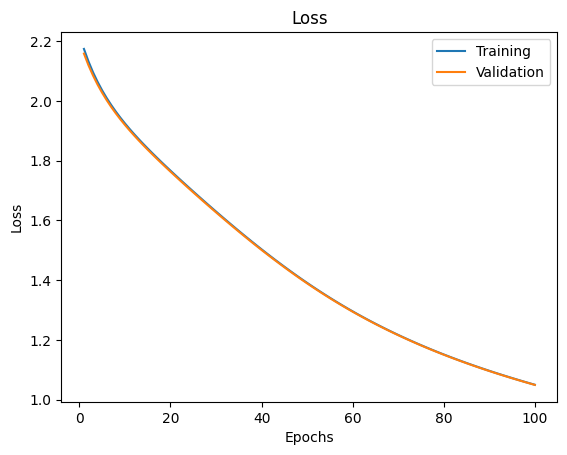

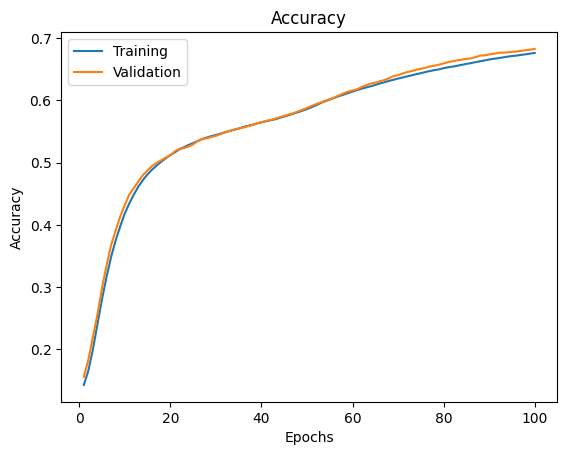

In [30]:
plot_loss(history3)
plot_accuracy(history3)

#MODIFICHE SOLO AL LEARNING RATE 0.001, 0.01, 0.0001, EPOCHE=50, ADAM

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer
from keras.optimizers import Adam  # Importa Adam

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model1 = Sequential()
model1.add(Input((dims,)))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(nb_classes, activation='softmax'))

# Usa Adam come ottimizzatore
optimizer1 = Adam(learning_rate=0.001)

model1.compile(optimizer=optimizer1, loss='categorical_crossentropy', metrics=['accuracy'])


Input Shape = 93
Number classes = Output Shape = 9


In [32]:
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer
from keras.optimizers import Adam  # Importa Adam

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model2 = Sequential()
model2.add(Input((dims,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(nb_classes, activation='softmax'))

# Usa Adam come ottimizzatore
optimizer2 = Adam(learning_rate=0.01)

model2.compile(optimizer=optimizer2, loss='categorical_crossentropy', metrics=['accuracy'])


Input Shape = 93
Number classes = Output Shape = 9


In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer
from keras.optimizers import Adam  # Importa Adam

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model3 = Sequential()
model3.add(Input((dims,)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(nb_classes, activation='softmax'))

# Usa Adam come ottimizzatore
optimizer3 = Adam(learning_rate=0.0001)

model3.compile(optimizer=optimizer3, loss='categorical_crossentropy', metrics=['accuracy'])


Input Shape = 93
Number classes = Output Shape = 9


In [34]:
history1 = model1.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.1)
history2 = model2.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.1)
history3 = model3.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6459 - loss: 1.0927 - val_accuracy: 0.7702 - val_loss: 0.6128
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7749 - loss: 0.5828 - val_accuracy: 0.7835 - val_loss: 0.5712
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7884 - loss: 0.5438 - val_accuracy: 0.7739 - val_loss: 0.5827
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7982 - loss: 0.5129 - val_accuracy: 0.7902 - val_loss: 0.5506
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8041 - loss: 0.4932 - val_accuracy: 0.7919 - val_loss: 0.5354
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8076 - loss: 0.4835 - val_accuracy: 0.7944 - val_loss: 0.5269
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8137 - loss: 0.4664 - val_accuracy: 0.7880 - val_loss: 0.5485
Epoch 8/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8160 - loss: 0.4630 - val_accuracy: 0.

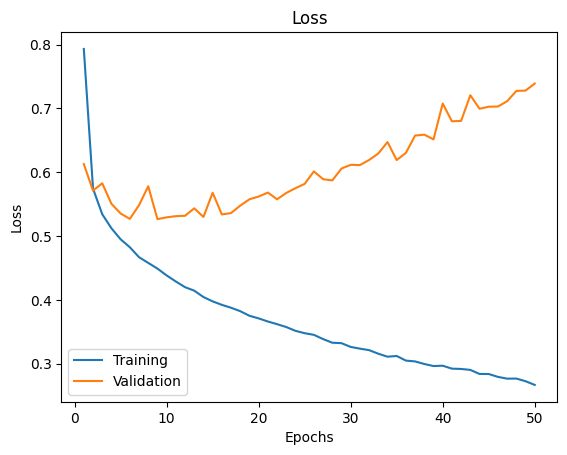

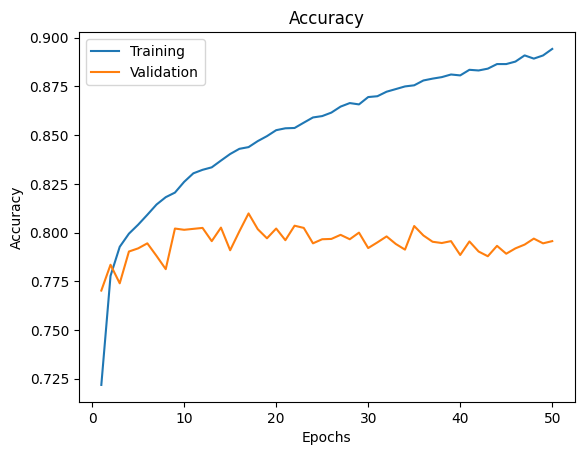

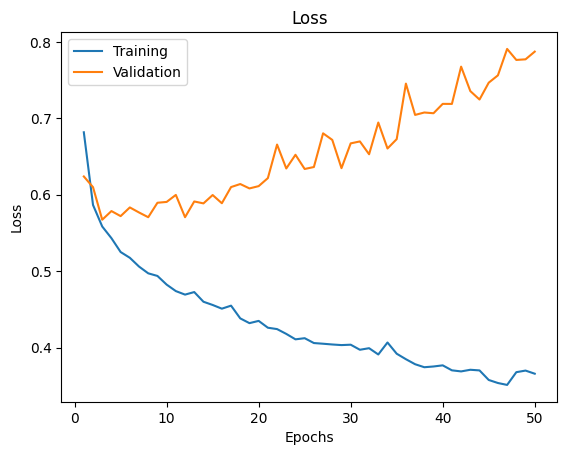

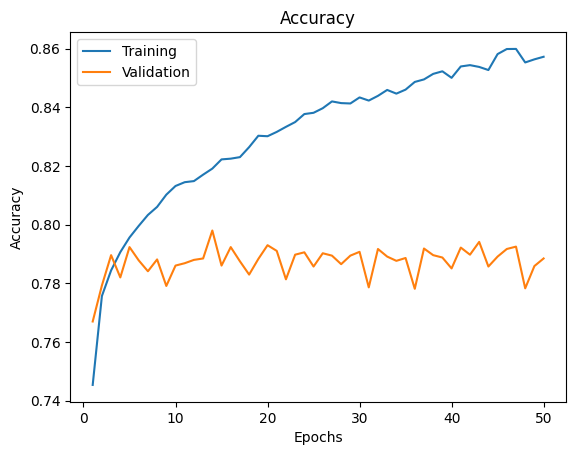

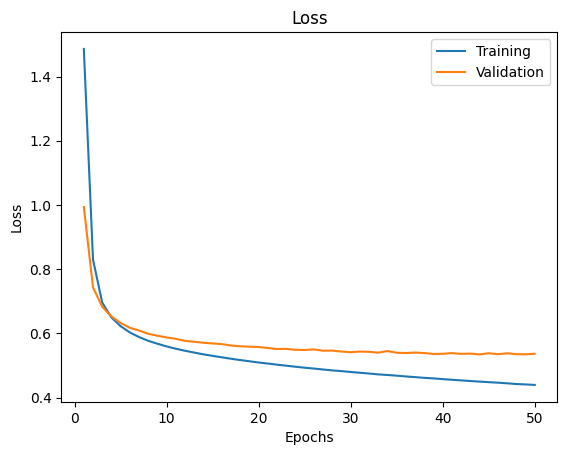

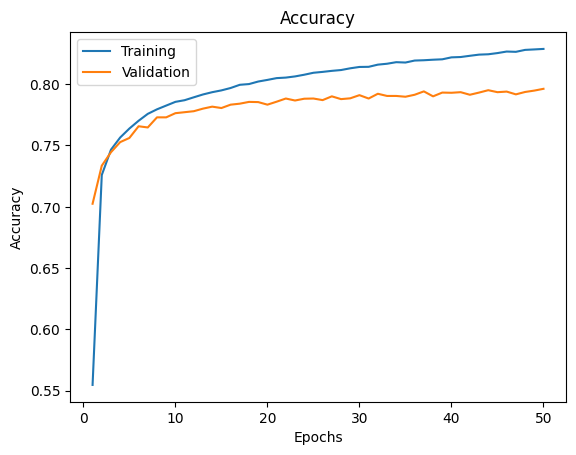

In [35]:
plot_loss(history1)
plot_accuracy(history1)

plot_loss(history2)
plot_accuracy(history2)

plot_loss(history3)
plot_accuracy(history3)

##MODIFICEH SOLO AL MODELLO 3 EPOCHE=15

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer
from keras.optimizers import Adam  # Importa Adam

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model3 = Sequential()
model3.add(Input((dims,)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(nb_classes, activation='softmax'))

# Usa Adam come ottimizzatore
optimizer3 = Adam(learning_rate=0.0001)

model3.compile(optimizer=optimizer3, loss='categorical_crossentropy', metrics=['accuracy'])


Input Shape = 93
Number classes = Output Shape = 9


In [37]:
history3 = model3.fit(X_train, Y_train, batch_size=128, epochs=15, validation_split=0.1)

Epoch 1/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4012 - loss: 1.8348 - val_accuracy: 0.6941 - val_loss: 0.9593
Epoch 2/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7100 - loss: 0.8776 - val_accuracy: 0.7311 - val_loss: 0.7403
Epoch 3/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7397 - loss: 0.7100 - val_accuracy: 0.7448 - val_loss: 0.6825
Epoch 4/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7493 - loss: 0.6647 - val_accuracy: 0.7519 - val_loss: 0.6557
Epoch 5/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7583 - loss: 0.6333 - val_accuracy: 0.7610 - val_loss: 0.6333
Epoch 6/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7674 - loss: 0.6123 - val_accuracy: 0.7665 - val_loss: 0.6207
Epoch 7/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7714 - loss: 0.5967 - val_accuracy: 0.7671 - val_loss: 0.6114
Epoch 8/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7759 - loss: 0.5801 - val_accuracy: 0.

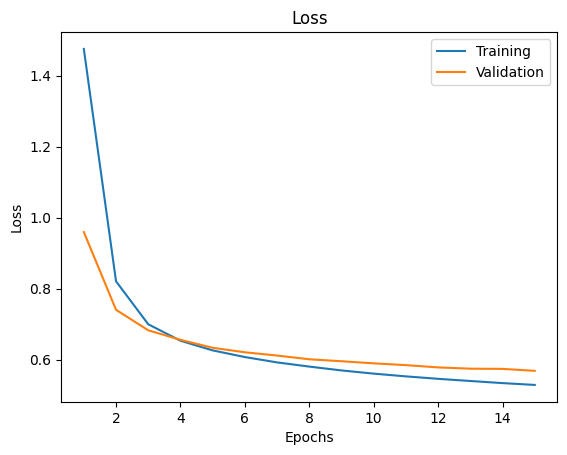

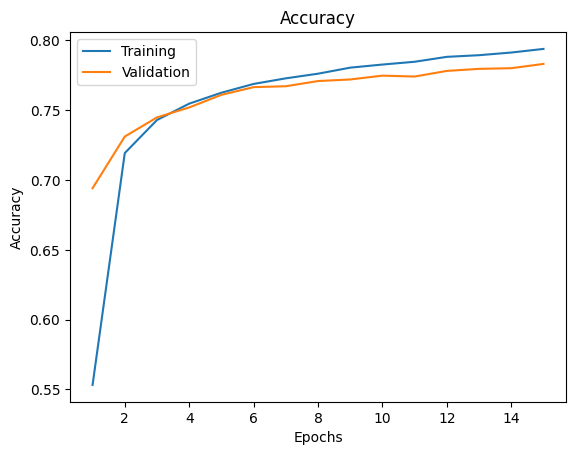

In [38]:
plot_loss(history3)
plot_accuracy(history3)

#MODIFICHE SOLO AL VALIDATION SPLIT 0.1, 0.01, 0.001, LEARNING RATE SEMPRE DI 0.001 E ADAM, EPOCHE = 50

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model1 = Sequential()
model1.add(Input((dims,)))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(nb_classes, activation='softmax'))

optimizer1 = Adam(learning_rate=0.001)

model1.compile(optimizer=optimizer1, loss='categorical_crossentropy',
              metrics=['accuracy'])

Input Shape = 93
Number classes = Output Shape = 9


In [40]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model2 = Sequential()
model2.add(Input((dims,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(nb_classes, activation='softmax'))

optimizer2 = Adam(learning_rate=0.001)

model2.compile(optimizer=optimizer2, loss='categorical_crossentropy',
              metrics=['accuracy'])

Input Shape = 93
Number classes = Output Shape = 9


In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model3 = Sequential()
model3.add(Input((dims,)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(nb_classes, activation='softmax'))

optimizer3 = Adam(learning_rate=0.001)

model3.compile(optimizer=optimizer3, loss='categorical_crossentropy',
              metrics=['accuracy'])

Input Shape = 93
Number classes = Output Shape = 9


In [42]:
history1 = model1.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.1)
history2 = model2.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.01)
history3 = model3.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.001)

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6480 - loss: 1.0816 - val_accuracy: 0.7636 - val_loss: 0.6181
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7761 - loss: 0.5765 - val_accuracy: 0.7820 - val_loss: 0.5743
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7907 - loss: 0.5336 - val_accuracy: 0.7865 - val_loss: 0.5550
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7977 - loss: 0.5111 - val_accuracy: 0.7907 - val_loss: 0.5400
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8094 - loss: 0.4882 - val_accuracy: 0.7922 - val_loss: 0.5422
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8118 - loss: 0.4727 - val_accuracy: 0.7973 - val_loss: 0.5295
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8183 - loss: 0.4549 - val_accuracy: 0.7978 - val_loss: 0.5232
Epoch 8/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8182 - loss: 0.4516 - val_accuracy: 0.

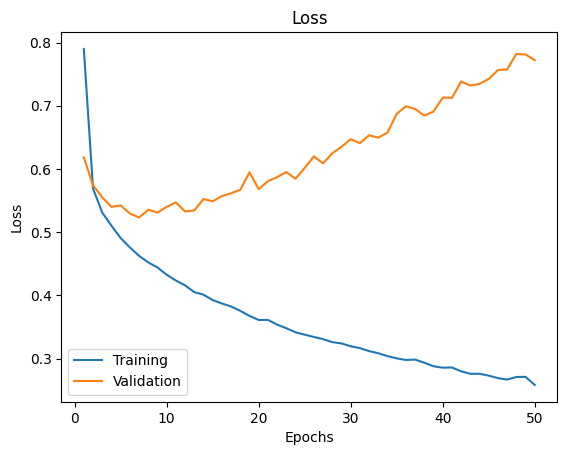

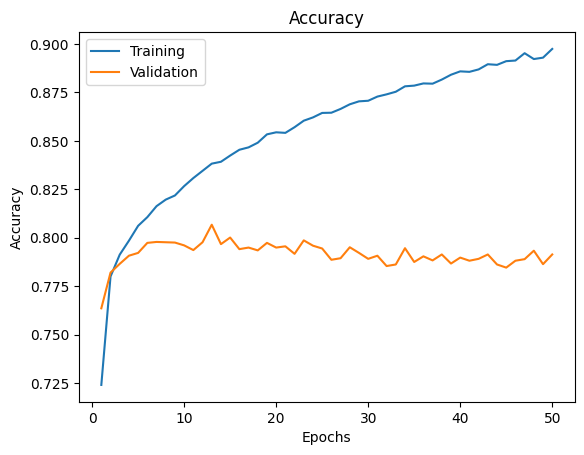

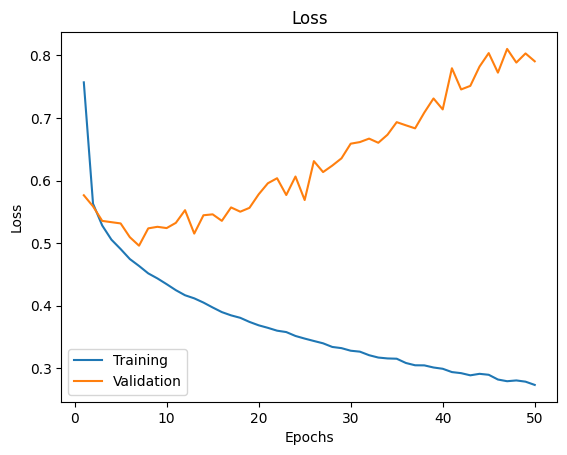

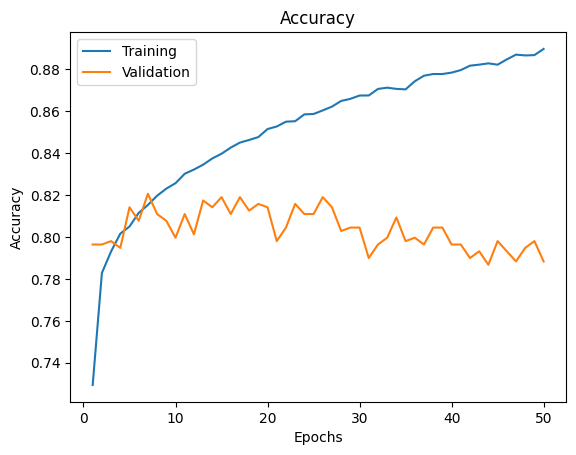

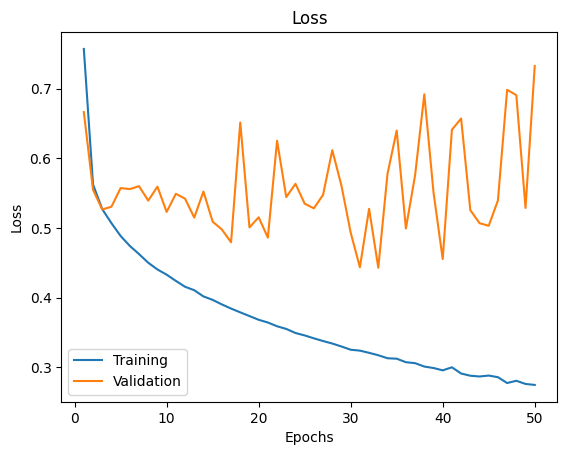

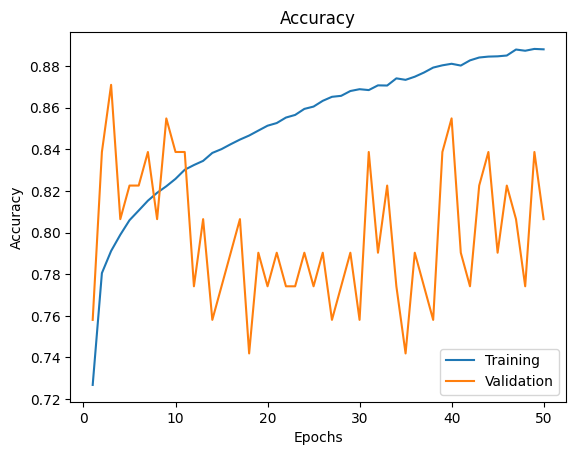

In [43]:
plot_loss(history1)
plot_accuracy(history1)

plot_loss(history2)
plot_accuracy(history2)

plot_loss(history3)
plot_accuracy(history3)

##MODIFICHE SOLO AL VALIDATION SPLIT 0.1, 0.01, 0.001 LEARNING RATE 0.0001, ADAM EPOCHE =50

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model1 = Sequential()
model1.add(Input((dims,)))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(nb_classes, activation='softmax'))

optimizer1 = Adam(learning_rate=0.0001)

model1.compile(optimizer=optimizer1, loss='categorical_crossentropy',
              metrics=['accuracy'])

Input Shape = 93
Number classes = Output Shape = 9


In [45]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model2 = Sequential()
model2.add(Input((dims,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(nb_classes, activation='softmax'))

optimizer2 = Adam(learning_rate=0.0001)

model2.compile(optimizer=optimizer2, loss='categorical_crossentropy',
              metrics=['accuracy'])

Input Shape = 93
Number classes = Output Shape = 9


In [46]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam

dims = X_train.shape[1]
print('Input Shape =', dims)

nb_classes = Y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

model3 = Sequential()
model3.add(Input((dims,)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(nb_classes, activation='softmax'))

optimizer3 = Adam(learning_rate=0.0001)

model3.compile(optimizer=optimizer3, loss='categorical_crossentropy',
              metrics=['accuracy'])

Input Shape = 93
Number classes = Output Shape = 9


In [47]:
history1 = model1.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.1)
history2 = model2.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.01)
history3 = model3.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.001)

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3803 - loss: 1.8221 - val_accuracy: 0.6976 - val_loss: 0.9708
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7112 - loss: 0.8873 - val_accuracy: 0.7296 - val_loss: 0.7492
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7360 - loss: 0.7245 - val_accuracy: 0.7452 - val_loss: 0.6843
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7520 - loss: 0.6640 - val_accuracy: 0.7502 - val_loss: 0.6510
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7657 - loss: 0.6238 - val_accuracy: 0.7597 - val_loss: 0.6286
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7718 - loss: 0.6029 - val_accuracy: 0.7665 - val_loss: 0.6120
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7736 - loss: 0.5941 - val_accuracy: 0.7697 - val_loss: 0.6022
Epoch 8/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7806 - loss: 0.5747 - val_accuracy: 0.

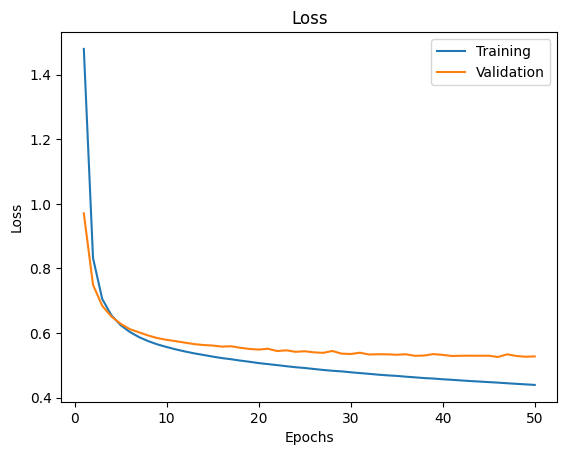

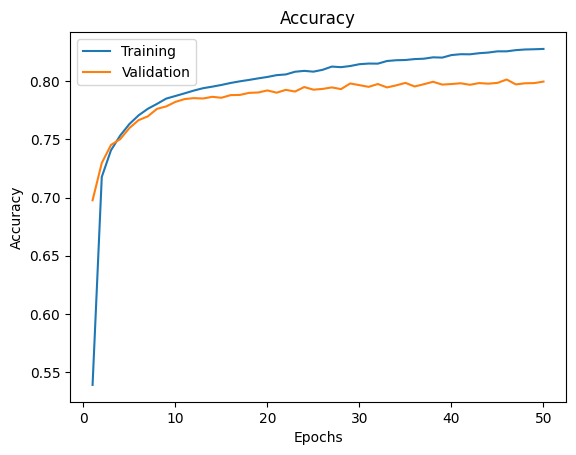

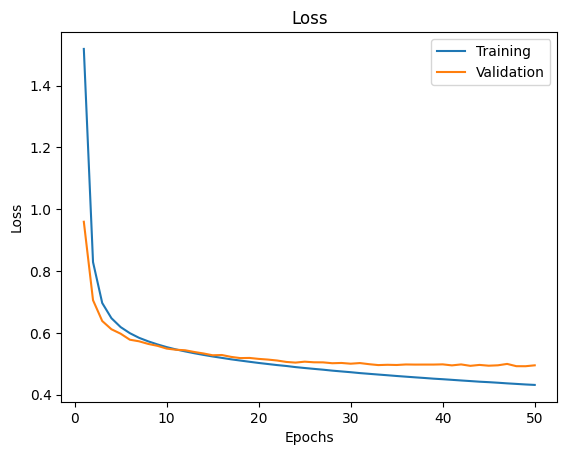

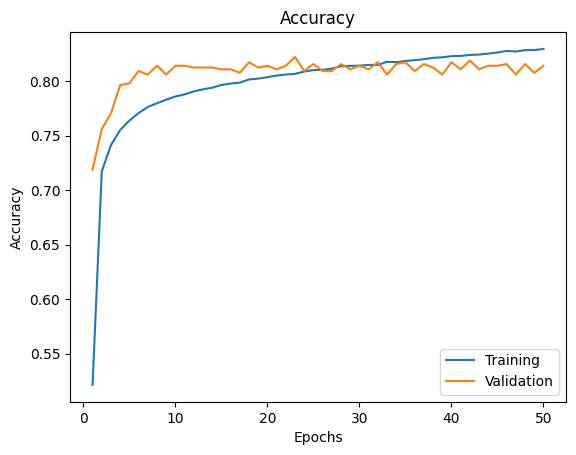

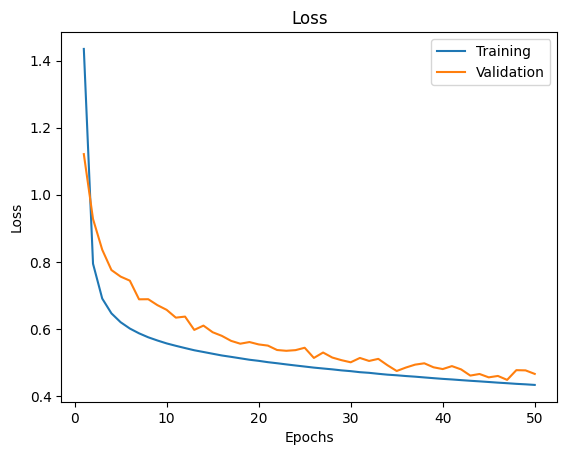

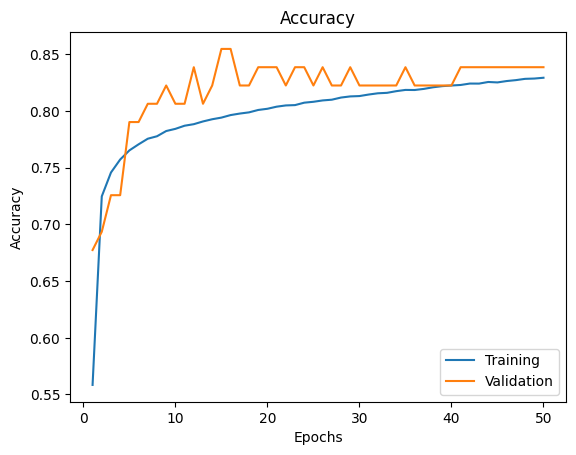

In [48]:
plot_loss(history1)
plot_accuracy(history1)

plot_loss(history2)
plot_accuracy(history2)

plot_loss(history3)
plot_accuracy(history3)